# Conformational analysis of CXCL12
by Gerard Martinez

Download all the required files for the tutorial from this [link](http://pub.htmd.org/confana1036hbl2450olw/filtered.tar.gz)

(warning: 2.6 Gb)

You can watch the presentation [here](https://youtu.be/I9VISC29Gc4)

In [1]:
%pylab inline
from htmd.ui import *
config(viewer='ngl')
os.chdir('/webdata/confana1036hbl2450olw/')  # Skip this command.

Populating the interactive namespace from numpy and matplotlib

Please cite HTMD: Doerr et al.(2016)JCTC,12,1845. https://dx.doi.org/10.1021/acs.jctc.6b00049

HTMD Documentation at: https://www.htmd.org/docs/latest/

You are on the latest HTMD version (1.7.15).



## 1. Introduction

### CXCL12 is a chemokine involved in...
*  many types of cancer 
*  inflammatory diseases 
*  early development events

### We performed...
* ~300 simulations x 200ns each (~60 microseconds in total)
* we filtered out the water from our trajectories 

![](http://pub.htmd.org/confana1036hbl2450olw/system-protein2.png)

## 2. Sampling major conformational states

In our lab we have tried many different metrics to assess the overall conformational changes of a protein. From them all, phi and psi angles of the protein backbone (dihedrals) have been the most successful descriptors in "blindly" capturing the major protein conformations.

In this section we will project our trajectories on the backbone dihedrals and, we will reduce the dimensionality by using tICA and then we will build a Markov Model to asses the major protein conformations in equilibrium. 

![](http://pub.htmd.org/confana1036hbl2450olw/conformations.png)

## Calculate metrics: protein backbone dihedrals

In [2]:
fsims = simlist(glob('./filtered/*/'), './filtered/filtered.pdb')

Creating simlist: 100% (289/289) [#################################] eta 00:00 -


CXCL12 has a very flexible C-terminus loop as well as a transiently disorderable N-terminal alfa helix. In this study we are not interested in them but in the core of the chemokine. For this reason, we will select residues from 10 to 54. 

In [3]:
metr = Metric(fsims)
metr.set(MetricDihedral(protsel='protein and resid 10 to 54', sincos=True))
data = metr.project()
data.fstep = 0.1

/home/joao/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: DeprecationWarning: The `projection` function/method has been deprecated since version 1.3.2. Use `htmd.projections.metric.Metric.set` instead.
  from ipykernel import kernelapp as app


Projecting trajectories: 100% (289/289) [##########################] eta 00:00 \


2017-04-05 16:06:50,259 - htmd.projections.metric - WARNING - Multiple framesteps [0.0, 0.1] ns were read from the simulations. Taking the statistical mode: 0.1ns. If it looks wrong, you can modify it by manually setting the MetricData.fstep property.


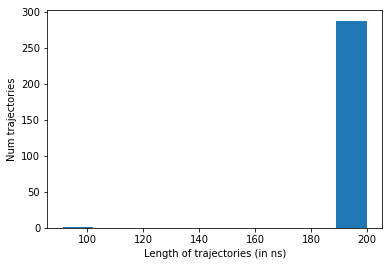

In [4]:
data.plotTrajSizes()

##  Dimensionality reduction

In [5]:
tica = TICA(data, 20)
dataTica = tica.project(3)

getting output of TICA: 100% (577/577) [###########################] eta 00:01 -

## Clustering

In [6]:
dataTica.cluster(MiniBatchKMeans(n_clusters=200), mergesmall=5)

2017-04-05 16:07:23,029 - htmd.metricdata - INFO - Mergesmall removed 0 clusters. Original ncluster 200, new ncluster 200.


## MSM analysis and visualization

estimating MaximumLikelihoodMSM: 100% (20/20) [####################] eta 00:00 \

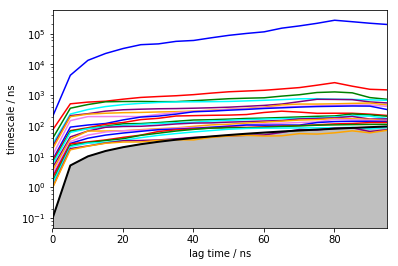

In [7]:
model = Model(dataTica)
model.plotTimescales(lags=list(range(1,1000,50)))

2017-04-05 16:09:18,533 - htmd.model - INFO - 99.7% of the data was used
2017-04-05 16:09:18,620 - htmd.model - INFO - Number of trajectories that visited each macrostate:
2017-04-05 16:09:18,622 - htmd.model - INFO - [ 64  45   2  31 289  16  15  10]
2017-04-05 16:09:18,624 - htmd.model - INFO - Take care! Macro 2 has been visited only in 2 trajectories:
2017-04-05 16:09:18,625 - htmd.model - INFO - 
simid = 232
parent = None
input = []
trajectory = ['./filtered/9x9/9x9-GERARD_VERYLONG_CXCL12_confAna-0-1-RND2283_9.filtered.xtc']
molfile = ./filtered/filtered.pdb
numframes = [2000]

2017-04-05 16:09:18,634 - htmd.model - INFO - 
simid = 265
parent = None
input = []
trajectory = ['./filtered/10x11/10x11-GERARD_VERYLONG_CXCL12_confAna-0-1-RND4691_9.filtered.xtc']
molfile = ./filtered/filtered.pdb
numframes = [2000]



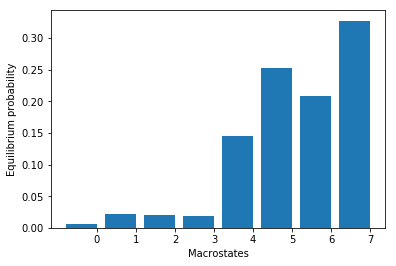

[ 0.0053318   0.0216567   0.02094427  0.0179421   0.14541308  0.25231467
  0.20907099  0.3273264 ]


In [8]:
model.markovModel(600, 8)
eqDist = model.eqDistribution()
print(eqDist)

In [9]:
#we can now visualize representatives for each of the equilibrium species 
model.numsamples=1
model.viewStates(protein=True)

Getting state Molecules: 100% (8/8) [##############################] eta 00:01 |


The installed widget Javascript is the wrong version.
The installed widget Javascript is the wrong version.


## Statistics
### What are the major differences between the states X and Y?

              atomIndexes                                        description  \
23   [253, 255, 262, 264]  Cosine of angle of (SER 16 N A A) (SER 16 CA A...   
28   [262, 264, 266, 279]  Sine of angle of (SER 16 C A A) (HSD 17 N A A)...   
86   [517, 521, 529, 531]  Sine of angle of (PRO 32 N A A) (PRO 32 CA A A...   
87   [517, 521, 529, 531]  Cosine of angle of (PRO 32 N A A) (PRO 32 CA A...   
92   [529, 531, 533, 543]  Sine of angle of (PRO 32 C A A) (ASN 33 N A A)...   
134  [711, 713, 723, 725]  Sine of angle of (ASN 44 N A A) (ASN 44 CA A A...   
135  [711, 713, 723, 725]  Cosine of angle of (ASN 44 N A A) (ASN 44 CA A...   
139  [725, 727, 737, 739]  Cosine of angle of (ASN 45 N A A) (ASN 45 CA A...   
140  [723, 725, 727, 737]  Sine of angle of (ASN 44 C A A) (ASN 45 N A A)...   
141  [723, 725, 727, 737]  Cosine of angle of (ASN 44 C A A) (ASN 45 N A ...   
144  [737, 739, 741, 751]  Sine of angle of (ASN 45 C A A) (ASN 46 N A A)...   

         type  
23   dihedral  
28   di

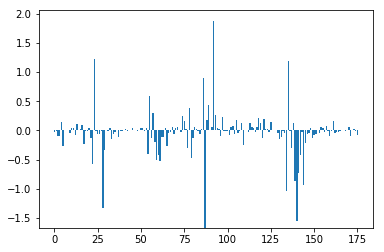

In [10]:
means = getStateStatistic(model, data, range(model.macronum))
plt.figure()
plt.bar(range(len(means[0])), means[7] - means[6])
idx = np.where(np.abs(means[7] - means[6]) > 0.6)[0]
print(data.map.ix[idx])

In [11]:
# we can visualize which residues are different between states
filtered = Molecule('./filtered/filtered.pdb')
filtered.view(sel='protein',style='NewCartoon',hold=True)
filtered.view(sel='resid 16 17 24 25 32 33 44 45',style='Licorice')

The installed widget Javascript is the wrong version.


## Mapping back
### Which trajectory originated the state X?

In [12]:
np.where(model.macro_ofmicro == 6)

(array([ 4,  8, 50]),)

In [13]:
_,rel = model.sampleStates(10, 10, statetype='micro')
print(rel)

[array([[ 132,  986],
       [ 247,  670],
       [  35, 1354],
       [ 132, 1767],
       [ 132, 1412],
       [ 132, 1943],
       [ 133, 1895],
       [  35, 1322],
       [ 249,  953],
       [ 247, 1568]])]


In [14]:
print(model.data.simlist[232])


simid = 232
parent = None
input = []
trajectory = ['./filtered/9x9/9x9-GERARD_VERYLONG_CXCL12_confAna-0-1-RND2283_9.filtered.xtc']
molfile = ./filtered/filtered.pdb
numframes = [2000]



## 3. Studying a defined reaction coordinate

Revising the literature related to CXCL12, we find a paper published by Andrea Bernini et al. (2014) where they describe the opening of a pocket in CXCL12 located between the 2nd and 3rd beta sheet (see pictures attached). To try to capture this phenomenon in our simulations, we will project our trajectories along the 2nd and 3rd beta-sheet distance. 

![](http://pub.htmd.org/confana1036hbl2450olw/openclose_struc.jpg)
![](http://pub.htmd.org/confana1036hbl2450olw/openclose_asa.png)

*Figures extracted from "Searching for protein binding sites from Molecular Dynamics simulations and paramagnetic fragment-based NMR studies", Andrea bernini et al., 2014 Mar;1844(3):561-6. doi: 10.1016/j.bbapap.2013.12.012. Epub 2013 Dec 27*

In [15]:
# The first selection corresponds to beta-sheet 2 carbons alpha, the second one to beta-sheet 3 CA.
# We specify metric='contacts' to create contact maps instead of proper distances,
# this means: create an interatom matrix and put 1 if the distance is below cutoff; 0 otherwise. 
metr = Metric(fsims)
metr.set(MetricDistance('resid 38 to 42 and noh', 'resid 22 to 28 and noh', metric='contacts'))
data3 = metr.project()
data3.fstep = 0.1

/home/joao/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: The `projection` function/method has been deprecated since version 1.3.2. Use `htmd.projections.metric.Metric.set` instead.


Projecting trajectories: 100% (289/289) [##########################] eta 00:01 /


2017-04-05 16:10:15,167 - htmd.projections.metric - WARNING - Multiple framesteps [0.0, 0.1] ns were read from the simulations. Taking the statistical mode: 0.1ns. If it looks wrong, you can modify it by manually setting the MetricData.fstep property.


In [16]:
# tICA projection (dimensionality reduction along the slow process)
tica3 = TICA(data3, 20)
dataTica3 = tica3.project(3)

getting output of TICA: 100% (577/577) [###########################] eta 00:01 /

In [17]:
# Clustering
dataTica3.cluster(MiniBatchKMeans(n_clusters=200), mergesmall=5)

2017-04-05 16:16:49,252 - htmd.metricdata - INFO - Mergesmall removed 0 clusters. Original ncluster 200, new ncluster 200.


estimating MaximumLikelihoodMSM: 100% (20/20) [####################] eta 00:01 -

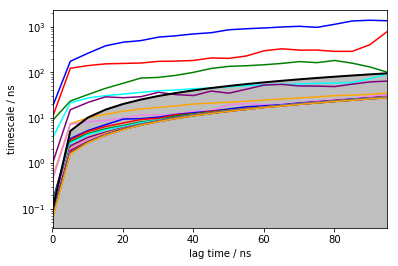

In [18]:
# Plot timescales
model3 = Model(dataTica3)
model3.plotTimescales(lags=list(range(1,1000,50)))

2017-04-05 16:17:04,181 - htmd.model - INFO - 100.0% of the data was used
2017-04-05 16:17:04,208 - htmd.model - INFO - Number of trajectories that visited each macrostate:
2017-04-05 16:17:04,210 - htmd.model - INFO - [  4   3  19 289]
2017-04-05 16:17:04,212 - htmd.model - INFO - Take care! Macro 1 has been visited only in 3 trajectories:
2017-04-05 16:17:04,214 - htmd.model - INFO - 
simid = 59
parent = None
input = []
trajectory = ['./filtered/3x9/3x9-GERARD_VERYLONG_CXCL12_confAna-0-1-RND1251_9.filtered.xtc']
molfile = ./filtered/filtered.pdb
numframes = [2000]

2017-04-05 16:17:04,216 - htmd.model - INFO - 
simid = 277
parent = None
input = []
trajectory = ['./filtered/10x23/10x23-GERARD_VERYLONG_CXCL12_confAna-0-1-RND9861_9.filtered.xtc']
molfile = ./filtered/filtered.pdb
numframes = [2000]

2017-04-05 16:17:04,219 - htmd.model - INFO - 
simid = 280
parent = None
input = []
trajectory = ['./filtered/10x27/10x27-GERARD_VERYLONG_CXCL12_confAna-0-1-RND0101_9.filtered.xtc']
molfile 

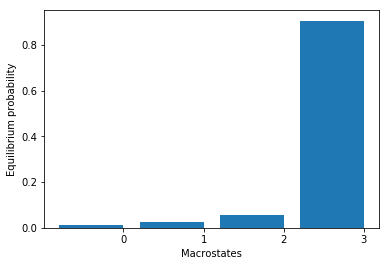

[ 0.0113379   0.02560474  0.05651182  0.90654554]


In [19]:
# Make Markov Model. we want to pick a lagtime where the timescales are converged (timescale is flat).
# 600 is the lagtime we want to use (600 frames is equivalent to 60ns). 4 is the number of macrostates.
model3.markovModel(600, 4)
eqDist = model3.eqDistribution()
print(eqDist)

In [20]:
# Visualize states
model3.viewStates(protein=True, numsamples=1)

Getting state Molecules: 100% (4/4) [##############################] eta 00:00 -


The installed widget Javascript is the wrong version.
The installed widget Javascript is the wrong version.


![](http://pub.htmd.org/confana1036hbl2450olw/conformation_open.png)

Did you see any macrostate where the pocket is open? what is the equilibrium population probability? Let's try to find the trajectory that produced the state...

In [21]:
# Map back the trajectory/ies that originated the macro. Substitute 1 for the macro that showed the pocket opening.
# This function is giving you the microclusters that are inside a given macrocluster
np.where(model3.macro_ofmicro ==1)

(array([4]),)

In [22]:
# substitute 48 for the micro number from the previous step
# This function gives you trajectory-frame pairs that visited a given micro
_, rel = model3.sampleStates(48, 5, statetype='micro')
print(rel)

[array([[ 225,  939],
       [ 184, 1082],
       [ 233, 1927],
       [ 206, 1849],
       [ 227,  983]])]


In [23]:
print(model3.data.simlist[277])


simid = 277
parent = None
input = []
trajectory = ['./filtered/10x23/10x23-GERARD_VERYLONG_CXCL12_confAna-0-1-RND9861_9.filtered.xtc']
molfile = ./filtered/filtered.pdb
numframes = [2000]



In [24]:
# Calculate RMSD of the site of interest for a selected trajectory
simus = simlist(glob('./filtered/10x23/'), './filtered/filtered.pdb')

Creating simlist: 100% (1/1) [#####################################] eta --:-- |


In [25]:
refmol = Molecule('./filtered/filtered.pdb')
metr = Metric(simus)
metr.set(MetricRmsd(refmol, 'resid 38 to 42 or resid 22 to 28 and noh', trajalnstr='protein'))
rmsd = metr.project()

/home/joao/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: The `projection` function/method has been deprecated since version 1.3.2. Use `htmd.projections.metric.Metric.set` instead.
  app.launch_new_instance()


Projecting trajectories: 100% (1/1) [##############################] eta --:-- -


2017-04-05 16:17:25,838 - htmd.projections.metric - INFO - Frame step 0.1ns was read from the trajectories. If it looks wrong, redefine it by manually setting the MetricData.fstep property.


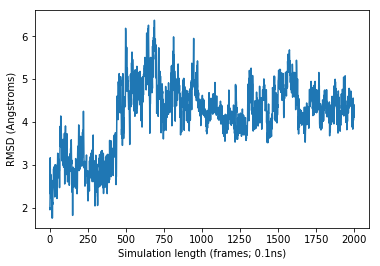

In [26]:
# Do you see the pocket opening at 50ns?
plt.plot(rmsd.dat[0])
plt.xlabel('Simulation length (frames; 0.1ns)', fontsize=10)
plt.ylabel('RMSD (Angstroms)', fontsize=10)

In [27]:
# You can also visualize the trajectory from your browser
refmol.read('./filtered/10x23/10x23-GERARD_VERYLONG_CXCL12_confAna-0-1-RND9861_9.filtered.xtc')
refmol.align('protein')
refmol.view()

The installed widget Javascript is the wrong version.


![](http://pub.htmd.org/confana1036hbl2450olw/view_trajectory.png)